In [1]:
%matplotlib inline

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-pastel')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats import boxcox

In [3]:
# importing the dataset
df = pd.read_csv('/Users/manju/Downloads/spotify_songs.csv')

# Display the first few rows of the dataset to get an overview of its structure
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
# Displaying the count number of distinct elements
df.nunique()

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64

In [5]:
# Generate descriptive statistics summarizing the numerical features in the dataset
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [6]:
# Displaying dataset assessment
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [7]:
# Checking for missing values
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [8]:
# Droppong the missing values 5 each in track_name, track_artist, track_album_name
df.dropna(inplace=True)

In [9]:
# Checking for missing values
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [10]:
# Checking for duplicate rows
df.duplicated().sum()

0

In [11]:
# Repeating Track ID
display(df['track_id'].value_counts()[df['track_id'].value_counts()>1])
display(df['track_id'].value_counts()[df['track_id'].value_counts()>1].sum())

track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
14sOS5L36385FJ3OL8hew4     9
3eekarcy7kvN4yt5ZFzltW     9
0sf12qNH5qcw8qpgymFOqD     8
7h0d2h0fUmzbs7zeFigJPn     8
                          ..
1louJpMmzEicAn7lzDalPW     2
2GdxQw8NwoeH8tKySg6nym     2
1EJgymgJHcjSOGSHcYaxvW     2
5scxjvcdozadBoRRN0UMaM     2
3iJeF2izF1QcpCgUc97BLl     2
Name: count, Length: 3165, dtype: int64

7641

In [12]:
# Same song is in multiple playlists
# Total of 7641 track id are repeating
df[df['track_id'] == '7h0d2h0fUmzbs7zeFigJPn'] #different playlists have the same track (only once in each)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
5540,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
9021,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,GTA San Andreas Radio Los Santos,6m0BqpJfSP2m5xCOFjDRHw,rap,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
11182,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,Trap Americana,7tkgK1tm9hYkWp7EFyOcAr,rap,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
18310,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
19718,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
21361,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,New Hip Hop‏‏​​ ‍,5WNUX6jisX0NRlVDTm6RDd,r&b,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
23163,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
30268,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874


In [13]:
#Converting 'track_album_release_date' column to datetime object type
# Convert the 'track_album_release_date' to a datetime object in the original dataframe
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Display the converted column to verify the changes
df[['track_album_release_date']].head()

,track_album_release_date
0,2019-06-14
1,2019-12-13
2,2019-07-05
3,2019-07-19
4,2019-03-05


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  32828 non-null  object        
 1   track_name                32828 non-null  object        
 2   track_artist              32828 non-null  object        
 3   track_popularity          32828 non-null  int64         
 4   track_album_id            32828 non-null  object        
 5   track_album_name          32828 non-null  object        
 6   track_album_release_date  30942 non-null  datetime64[ns]
 7   playlist_name             32828 non-null  object        
 8   playlist_id               32828 non-null  object        
 9   playlist_genre            32828 non-null  object        
 10  playlist_subgenre         32828 non-null  object        
 11  danceability              32828 non-null  float64       
 12  energy                 

In [15]:
#Null Values check for track_album_release_date column after datatype conversion
missing_date = df['track_album_release_date'].isna() | (df['track_album_release_date'] == '')
print(missing_date.sum())

1886


In [16]:
#Data set has only year for few of the records approximately 1886 records. They are coming as null
null_rows = df[df['track_album_release_date'].isnull()]
display(null_rows)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
151,2QtJA4gbwe1AcanB2p21aP,Stay The Night - Featuring Hayley Williams Of ...,Zedd,61,4xak0izXQHOMV9Wu1mDAAy,Clarity (Deluxe),NaT,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,8,-3.109,1,0.0411,0.10900,0.000000,0.0947,0.461,127.961,217347
749,77j9HOrxUpWcjwra9jgvio,We like to Party! (Six Flags),Vengaboys,51,0R44mmTKUE1XCuGVVrPfTZ,We like to Party! (The Vengabus),NaT,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,8,-7.929,1,0.0449,0.00803,0.859000,0.0460,0.969,136.018,224227
750,6rQ9qJPvInEqSzlh89LsPJ,Coco Jamboo - Radio Version,Mr. President,18,2t8Bc4qBseswbwOoHGHK8d,We See The Same Sun,NaT,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,1,-5.414,0,0.0421,0.07910,0.000000,0.1520,0.965,100.019,218733
751,5FgtdSf7I5lClThz2ptWvl,Blue (Da Ba Dee),Eiffel 65,16,65DySolRDG1LNSvRXcWQWN,Europop,NaT,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,7,-11.471,0,0.0582,0.25900,0.000162,0.3900,0.765,128.007,283748
753,2ahnofp2LbBWDXcJbMaSTu,What Is Love,Haddaway,70,0qTVjeVP70YvQG4GctetOf,What is Love - Remix,NaT,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,7,-7.907,0,0.0311,0.02220,0.014900,0.2030,0.737,123.871,270373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32360,0363w3IUcO4cJMsAFLpfLY,Faith - Radio Edit,Blasterjaxx,0,1IZUFYTXNbjkzgawT7cFpM,Faith,NaT,Gym (Melbourne Bounce/Progressive House),5BqOZpVEqRDfZScvW1QUyA,edm,...,9,-6.566,0,0.0486,0.00636,0.002310,0.1870,0.670,128.009,183067
32767,1h7LBCgfnSUEe7qXRbwMIp,Push Play,Zedd,39,4xak0izXQHOMV9Wu1mDAAy,Clarity (Deluxe),NaT,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,9,-1.440,1,0.0459,0.08680,0.000000,0.0841,0.252,130.030,219360
32774,1NtVWYw9QDr30Ei0phACni,Lessons In Love (feat. Neon Trees),Kaskade,23,7r47EiktL01BmvI7NHdgcA,Fire & Ice,NaT,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,7,-4.335,1,0.0540,0.02650,0.000013,0.1330,0.597,127.989,247693
32775,454ZIylnCq09ONjQE4EJ6a,Turn It Down (with Rebecca & Fiona) - Radio Edit,Kaskade,13,0xiigD6kCGMSv9CcSpJFUr,"I Love You, Man (Bonus Track Version)",NaT,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-7.922,0,0.0455,0.05360,0.008350,0.3390,0.413,126.971,238360


In [17]:
# Replace empty strings with NaT
df['track_album_release_date'].replace('', pd.NaT, inplace=True)

# Drop rows where 'track_album_release_date' is NaT
df = df.dropna(subset=['track_album_release_date'])

# Check if the rows were removed
print(df['track_album_release_date'].isna().sum())

0


In [18]:
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [19]:
# Checking if each repeated track ID have same features such as duration, popularity, loudeness
df[df['track_id'].duplicated()].sort_values(by='track_id')
# yes, the other properties are same for duplicated track id

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32084,00Gu3RMpDW2vO9PjlMVFDL,Hide Away (feat. Envy Monroe),Blasterjaxx,42,5pqG85igfoeWcCDIsSi9x7,Hide Away (feat. Envy Monroe),2019-06-21,Epic Bass Drops | Best House Mixes,4IS7o1utOzhimFEFnj9gmu,edm,...,10,-4.894,1,0.0421,0.02490,0.000000,0.3610,0.134,130.001,188000
23850,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,59,1jg2UPoSAr7CDPsEXcabo1,Fast & Furious 6,2013-01-01,Today's Hits (Clean),7ENISpOJhocpMJVcGb0qcT,r&b,...,8,-4.573,1,0.4080,0.05210,0.000000,0.0568,0.552,171.966,227893
28968,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,59,1jg2UPoSAr7CDPsEXcabo1,Fast & Furious 6,2013-01-01,Locker Room,37i9dQZF1DX8SaiEt4OVJw,edm,...,8,-4.573,1,0.4080,0.05210,0.000000,0.0568,0.552,171.966,227893
9345,00ReeHCY0FQUyuAUyPJdnk,Ain't No Future In Yo' Frontin',MC Breed,48,7mLks5uEIPmT0056mb5oV3,MC Breed & DFC,1991-01-01,90's Gangster Rap,1g3APxk2mLVNU2TuHCPli0,rap,...,0,-9.644,1,0.2480,0.05140,0.000000,0.4740,0.731,102.192,244733
14626,00WIXhVVhswHuS6dlkScuw,Hot,Confetti,51,6nsXqX8wZbkiqSKmSqxsuT,Hot,2019-11-22,Modern Indie Rock // Alternative Rock / Garage...,1VnvyBDqoV5TCZAnXYferL,rock,...,7,-3.883,1,0.1070,0.00297,0.000002,0.1200,0.664,168.015,150714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26407,7zBkFHiWejDPxIimU8XpVw,All over You,LEISURE,2,1SZzXX9j7MdYNkvWadCr4i,Leisure,2016-10-21,Neo-Jazz Soul RnB & Afro,48AzM7l4M02DBYd2N3IFLP,r&b,...,2,-8.826,1,0.0518,0.16200,0.005520,0.0920,0.867,70.007,234925
25577,7zFXmv6vqI4qOt4yGf3jYZ,Get You (feat. Kali Uchis),Daniel Caesar,78,3xybjP7r2VsWzwvDQipdM0,Freudian,2017-08-25,NEO-soul,3q3M4VCymcMoxJ3Tl7mRqN,r&b,...,4,-8.533,0,0.0321,0.42200,0.000052,0.0749,0.358,74.038,278180
32074,7zHrHnVSQwI95FGHewXDl8,Do Bad Well (feat. Nevve),KSHMR,62,3BAigRfKg2iyWJuWlZCZZQ,Do Bad Well (feat. Nevve),2019-10-11,Epic Bass Drops | Best House Mixes,4IS7o1utOzhimFEFnj9gmu,edm,...,5,-4.755,1,0.1130,0.05120,0.000315,0.2340,0.415,127.964,204375
30939,7zsXy7vlHdItvUSH8EwQss,Cold Water,Major Lazer,69,3Kmo85mapQ2wTaCAHBkKsK,Cold Water,2016-07-22,EDM/POP,6gHk5RFrnALbDNJdaXKivi,edm,...,6,-5.092,0,0.0432,0.07360,0.000000,0.1560,0.501,92.943,185360


In [20]:
# Check the skewness of all numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate skewness for these features
print(df[numerical_features].skew())

track_popularity   -0.233573
danceability       -0.513590
energy             -0.637447
key                -0.019212
loudness           -1.409080
mode               -0.245655
speechiness         1.944476
acousticness        1.594463
instrumentalness    2.709762
liveness            2.095760
valence             0.013584
tempo               0.525084
duration_ms         1.169463
dtype: float64


# HANDLING SKEWNESS

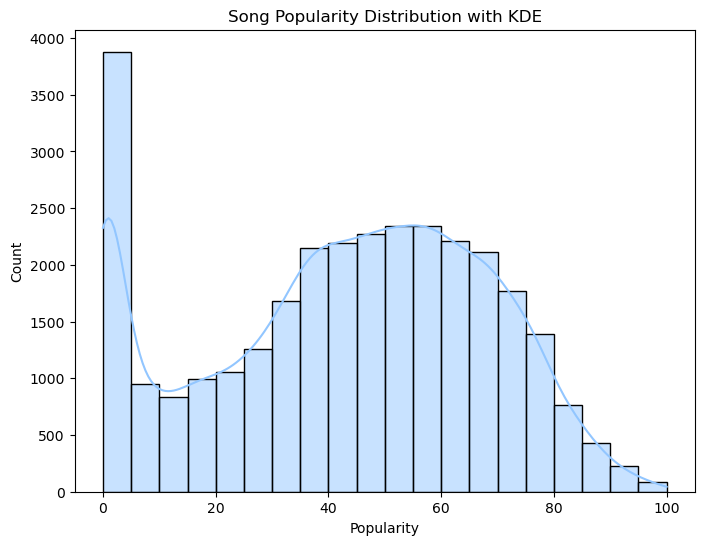

In [21]:
# song popularity histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['track_popularity'], bins=20, kde=True)

# Add title and labels
plt.title('Song Popularity Distribution with KDE')
plt.xlabel('Popularity')

# Show the plot
plt.show()

In [22]:



def suggest_sampling_strategy(bin_distribution, total_desired_samples=None):
    """
    Suggest sampling strategy based on popularity distribution
    """
    if total_desired_samples is None:
        #total_desired_samples = len(bin_distribution) * 1400  # sample size can increase/decrease
        total_desired_samples = len(bin_distribution) * 2000  
    
    # Calculate target samples per bin for more balanced distribution
    target_samples = total_desired_samples // len(bin_distribution)
    
    sampling_strategy = {}
    for bin_name, count in bin_distribution.items():
        if count > target_samples:
            sampling_strategy[bin_name] = ('downsample', target_samples)
        else:
            sampling_strategy[bin_name] = ('upsample', target_samples)
    
    return sampling_strategy

def apply_sampling_strategy(df, sampling_strategy):
    """
    Apply the suggested sampling strategy to create a more balanced dataset
    """
    sampled_dfs = []
    
    for bin_name, (strategy, target_count) in sampling_strategy.items():
        bin_df = df[df['popularity_bin'] == bin_name]
        
        if strategy == 'downsample':
            sampled_df = bin_df.sample(n=target_count, random_state=42)
        else:  # upsample
            sampled_df = bin_df.sample(n=target_count, replace=True, random_state=42)
        
        sampled_dfs.append(sampled_df)
    
    return pd.concat(sampled_dfs, ignore_index=True)

In [23]:
def analyze_popularity_distribution(df):
    """
    Analyze the distribution of track popularity and suggest sampling strategies
    """
    # Calculate skewness
    skewness = df['track_popularity'].skew()
    
    # Create distribution plot
    plt.figure(figsize=(12, 6))
    
    # Histogram with KDE
    sns.histplot(data=df, x='track_popularity', kde=True)
    plt.title(f'Distribution of Track Popularity (Skewness: {skewness:.2f})')
    plt.xlabel('Track Popularity')
    plt.ylabel('Count')
    plt.show()
    
    # Calculate some statistical measures
    stats_dict = {
        'mean': df['track_popularity'].mean(),
        'median': df['track_popularity'].median(),
        'std': df['track_popularity'].std(),
        'skewness': skewness,
        'kurtosis': df['track_popularity'].kurtosis()
    }
    
    # Create popularity bins
    df['popularity_bin'] = pd.qcut(df['track_popularity'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    
    # Calculate bin distributions
    bin_distribution = df['popularity_bin'].value_counts().sort_index()
    
    return stats_dict, bin_distribution



def suggest_balanced_sampling_strategy(bin_distribution):
    """
    Suggest sampling strategy to balance the distribution without providing a fixed sample size.
    """
    # Decide target count per bin based on the maximum bin count (for upsampling) or minimum bin count (for downsampling)
    max_count = bin_distribution.max()  # Maximum count in any bin
    min_count = bin_distribution.min()  # Minimum count in any bin

    # Strategy: Either make all bins equal to the max count (upsample) or min count (downsample)
    sampling_strategy = {}
    for bin_name, count in bin_distribution.items():
        if count > min_count:
            sampling_strategy[bin_name] = ('downsample', min_count)
        else:
            sampling_strategy[bin_name] = ('upsample', max_count)
    
    return sampling_strategy


def apply_balanced_sampling_strategy(df, sampling_strategy):
    """
    Apply the suggested sampling strategy to balance the dataset automatically.
    """
    sampled_dfs = []
    
    for bin_name, (strategy, target_count) in sampling_strategy.items():
        bin_df = df[df['popularity_bin'] == bin_name]
        
        if strategy == 'downsample':
            sampled_df = bin_df.sample(n=target_count, random_state=42)
        else:  # upsample
            sampled_df = bin_df.sample(n=target_count, replace=True, random_state=42)
        
        sampled_dfs.append(sampled_df)
    
    return pd.concat(sampled_dfs, ignore_index=True)


In [24]:
from sklearn.utils import resample
# Define bins for undersampling (adjust according to your data distribution)
bins = [0, 20, 40, 60, 80, 100]  # Example: popularity ranges
df['popularity_bin'] = pd.cut(df['track_popularity'], bins=bins)

# Find the minimum sample size across bins
min_size = df['popularity_bin'].value_counts().min()

# Perform undersampling
undersampled_frames = [
    resample(group, replace=False, n_samples=min_size, random_state=42)
    for _, group in df.groupby('popularity_bin')
]
balanced_df = pd.concat(undersampled_frames).drop(columns=['popularity_bin'])


balanced_df.shape[0]

6700

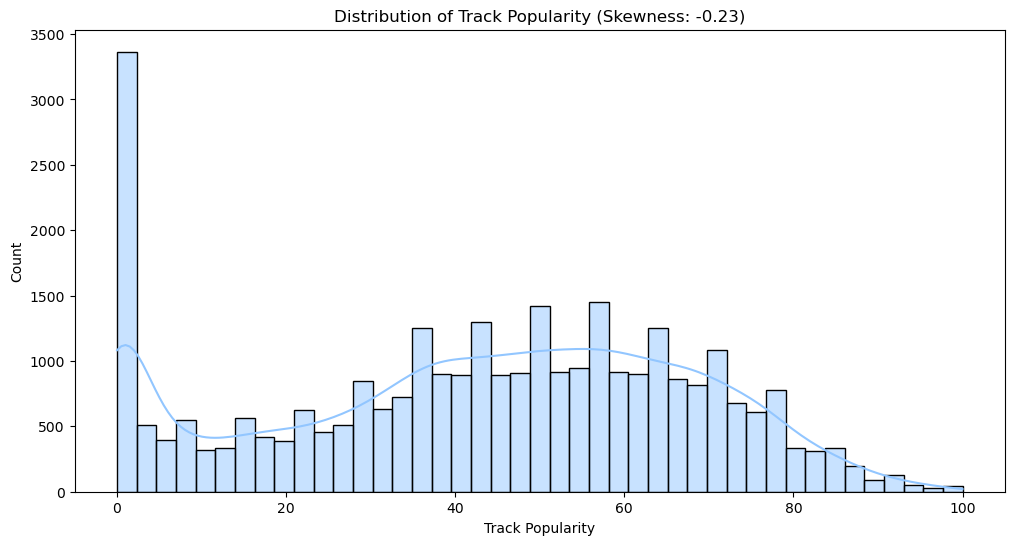


Original Distribution Statistics:
mean: 42.76
median: 45.00
std: 24.95
skewness: -0.23
kurtosis: -0.91

Bin Distribution:
popularity_bin
Very Low     6241
Low          6565
Medium       5885
High         6321
Very High    5930
Name: count, dtype: int64

After Sampling:


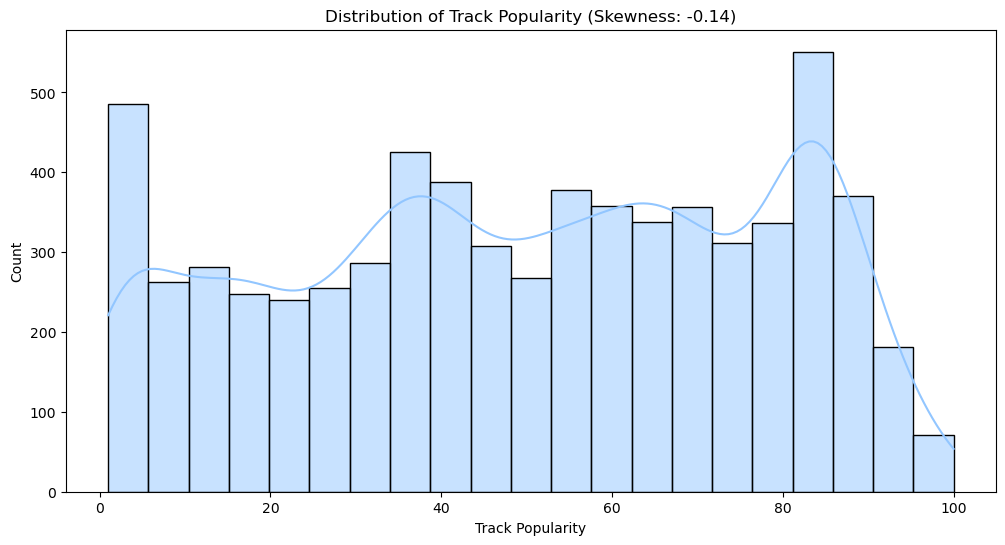

In [25]:
# Analyze original distribution
stats_dict, bin_distribution = analyze_popularity_distribution(df)
    
print("\nOriginal Distribution Statistics:")
for stat_name, value in stats_dict.items():
    print(f"{stat_name}: {value:.2f}")
    
print("\nBin Distribution:")
print(bin_distribution)
'''   
 Get sampling strategy
sampling_strategy = suggest_balanced_sampling_strategy(bin_distribution)
    
print("\nSuggested Sampling Strategy:")
for bin_name, (strategy, target_count) in sampling_strategy.items():
    print(f"{bin_name}: {strategy.title()} to {target_count} samples")
    
# Apply sampling strategy
balanced_df = apply_balanced_sampling_strategy(df, sampling_strategy)'''

    
# Show new distribution
print("\nAfter Sampling:")
_, new_bin_distribution = analyze_popularity_distribution(balanced_df)

In [26]:
balanced_df.shape

(6700, 24)

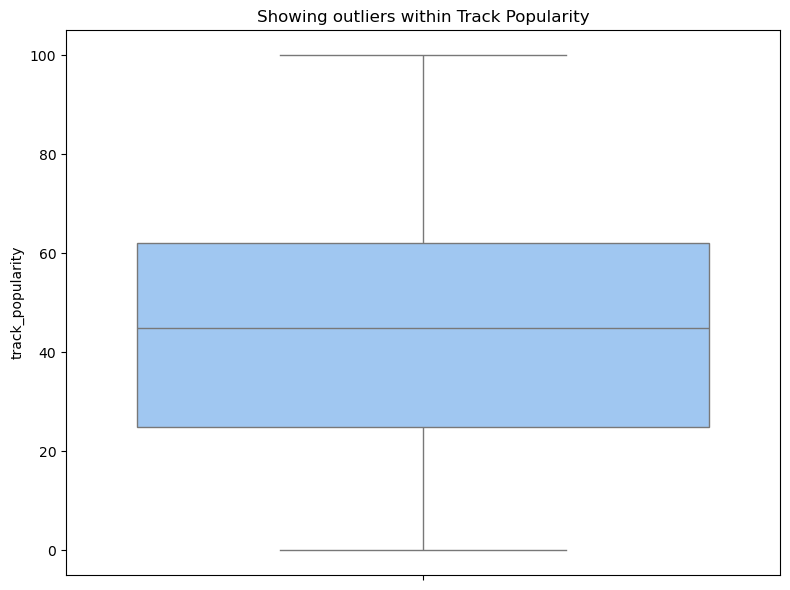

In [27]:
# track_popularity is left skewed (-0.233485)
# checking for outliners
# Plot Demand outliers
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df, y='track_popularity', ax=ax)
ax.set_title('Showing outliers within Track Popularity')
plt.tight_layout()
plt.show()
# No outliers

# Feature Engineering

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
# Droping columns that do not impact the track_popularity calcuation
spotify_data_cleaned = balanced_df.drop(columns=[
    #'track_id', 
    'track_name', 
    'track_artist', 'track_album_id', 
    'track_album_name', 'track_album_release_date', 'playlist_name', 
    'playlist_id', 'playlist_genre','playlist_subgenre'
])

In [30]:
# Selecting only numeric columns for correlation analysis
numeric_data = spotify_data_cleaned.select_dtypes(include=[np.number])

# Calculating correlation with 'track_popularity'
correlations = numeric_data.corr()['track_popularity'].sort_values(ascending=False)

# Displaying the correlations
print("Correlation with Track Popularity:\n", correlations)

Correlation with Track Popularity:
 track_popularity    1.000000
danceability        0.120960
loudness            0.113308
acousticness        0.105726
valence             0.037916
speechiness         0.034219
key                 0.031075
tempo              -0.011857
mode               -0.012885
liveness           -0.068633
energy             -0.152322
duration_ms        -0.164307
instrumentalness   -0.194537
Name: track_popularity, dtype: float64


In [31]:
spotify_data_cleaned.head()

,track_id,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_bin
2192,3gNNXc7GUgKRPR15W77eDR,14,0.821,0.676,3,-6.366,0,0.0547,0.187000,0.0001,0.0904,0.559,119.012,213187,Very Low
28623,7G9gZnOXPqmOHRi05wszac,14,0.736,0.983,7,-2.353,1,0.0517,0.003840,0.2480,0.3090,0.515,122.941,145366,Very Low
29004,4y2HJqSTmGtWtPsK4ITKjN,16,0.519,0.946,11,-4.139,0,0.0523,0.000095,0.4830,0.3940,0.278,131.980,236308,Very Low
23138,3VEpvUAoN9UBaN2NZ6JW29,14,0.776,0.696,9,-8.294,1,0.0814,0.273000,0.0000,0.0564,0.927,109.958,175786,Very Low
25466,3MThD7whZTtnIzx1Vq1GZi,8,0.707,0.554,2,-8.404,0,0.0379,0.565000,0.0000,0.1270,0.653,90.011,269073,Very Low


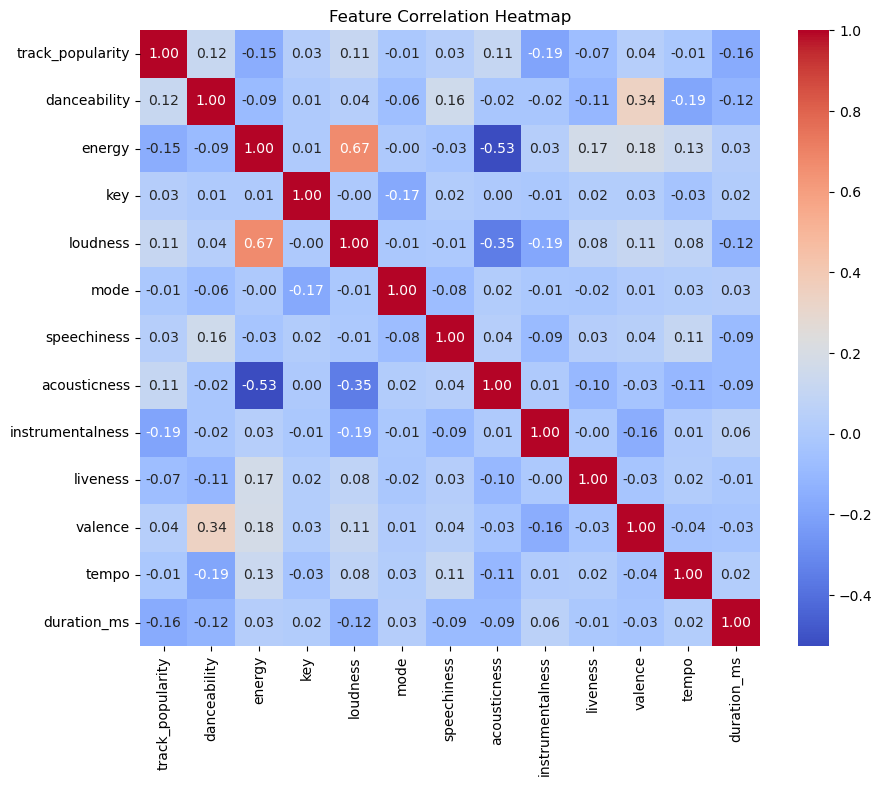

In [32]:
# Visualizing correlation with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [302]:
# Identifying categorical columns and apply one-hot encoding
# categorical_cols = spotify_data_cleaned.select_dtypes(include=['object']).columns
# spotify_data_encoded = pd.get_dummies(spotify_data_cleaned, columns=categorical_cols, drop_first=True)


# Using Random Forest to get feature importance
# X = spotify_data_encoded.drop(columns=['track_popularity'])
# y = spotify_data_encoded['track_popularity']
# model = RandomForestRegressor(random_state=42)
# model.fit(X, y)

# Feature importance
# feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
# print("Feature Importances:\n", feature_importances)

# Ploting feature importances with help of bar chart
# plt.figure(figsize=(10, 6))
# feature_importances.plot(kind='bar')
# plt.title("Feature Importances for Track Popularity Prediction")
# plt.show()

# Feature Selection and Preparation

In [303]:
# Split data into training and testing sets
train_df, test_df = train_test_split(balanced_df, test_size=0.2, random_state=42)

# First, create artist encoding using training data only to prevent data leakage
artist_popularity_mean = train_df.groupby('track_artist')['track_popularity'].mean()
artist_popularity_std = train_df.groupby('track_artist')['track_popularity'].std()

# Add artist features to train and test sets
train_df['artist_avg_popularity'] = train_df['track_artist'].map(artist_popularity_mean)
test_df['artist_avg_popularity'] = test_df['track_artist'].map(artist_popularity_mean)
train_df['artist_std_popularity'] = train_df['track_artist'].map(artist_popularity_std)
test_df['artist_std_popularity'] = test_df['track_artist'].map(artist_popularity_std)

# Fill NaN values (for artists not in training set) with global means
train_global_mean = train_df['track_popularity'].mean()
train_global_std = train_df['track_popularity'].std()
train_df['artist_avg_popularity'] = train_df['artist_avg_popularity'].fillna(train_global_mean)
test_df['artist_avg_popularity'] = test_df['artist_avg_popularity'].fillna(train_global_mean)
train_df['artist_std_popularity'] = train_df['artist_std_popularity'].fillna(train_global_std)
test_df['artist_std_popularity'] = test_df['artist_std_popularity'].fillna(train_global_std)

# Prepare features
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'duration_ms'
]

# Convert release date to numeric feature
balanced_df['release_year'] = pd.to_datetime(balanced_df['track_album_release_date']).dt.year

# Combine features (without playlist_genre)
features = pd.concat([
    balanced_df[audio_features],
    balanced_df[['release_year']],
    pd.DataFrame({
        'artist_avg_popularity': balanced_df.index.map(lambda x: 
            train_df['artist_avg_popularity'][x] if x in train_df.index 
            else test_df['artist_avg_popularity'][x]),
        'artist_std_popularity': balanced_df.index.map(lambda x: 
            train_df['artist_std_popularity'][x] if x in train_df.index 
            else test_df['artist_std_popularity'][x])
    })
], axis=1)

# Split features and target
X_train = features.loc[train_df.index]
X_test = features.loc[test_df.index]
y_train = train_df['track_popularity']
y_test = test_df['track_popularity']

# Select top features
selector = SelectKBest(score_func=f_regression, k=15)  # reduced from 20 since we have fewer features
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.get_support()].tolist()


# Keep only selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

'''# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''
print("Selected Features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")
    

ValueError: Input X contains NaN.
SelectKBest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [304]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures


# Split data into training and testing sets
train_df, test_df = train_test_split(balanced_df, test_size=0.2, random_state=42)

# Compute artist statistics using training data only
artist_popularity_mean = train_df.groupby('track_artist')['track_popularity'].mean()
artist_popularity_std = train_df.groupby('track_artist')['track_popularity'].std()

# Add artist features to train and test sets
train_df['artist_avg_popularity'] = train_df['track_artist'].map(artist_popularity_mean)
test_df['artist_avg_popularity'] = test_df['track_artist'].map(artist_popularity_mean)

train_df['artist_std_popularity'] = train_df['track_artist'].map(artist_popularity_std)
test_df['artist_std_popularity'] = test_df['track_artist'].map(artist_popularity_std)

# Fill NaN values (for artists not in training set) with global means from the training data
train_global_mean = train_df['track_popularity'].mean()
train_global_std = train_df['track_popularity'].std()

train_df['artist_avg_popularity'].fillna(train_global_mean, inplace=True)
test_df['artist_avg_popularity'].fillna(train_global_mean, inplace=True)

train_df['artist_std_popularity'].fillna(train_global_std, inplace=True)
test_df['artist_std_popularity'].fillna(train_global_std, inplace=True)

audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'duration_ms'
]

# Convert release date to numeric feature (release year and song age)
train_df['release_year'] = pd.to_datetime(train_df['track_album_release_date']).dt.year
test_df['release_year'] = pd.to_datetime(test_df['track_album_release_date']).dt.year

# Compute song age (using 2024 as the reference year)
train_df['song_age'] = 2024 - train_df['release_year']
test_df['song_age'] = 2024 - test_df['release_year']

# Combine selected features (audio, temporal, and artist features)
features = audio_features + ['release_year', 'song_age', 'artist_avg_popularity', 'artist_std_popularity']

# Define feature matrix and target variable
X_train = train_df[features]
X_test = test_df[features]
y_train = train_df['track_popularity']
y_test = test_df['track_popularity']

# Use SelectKBest with mutual information regression to handle non-linear relationships
selector = SelectKBest(score_func=mutual_info_regression, k=15)
selector.fit(X_train, y_train)

# Extract selected features
selected_features = X_train.columns[selector.get_support()].tolist()

# Keep only selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

'''# Scaling the features and adding polynomial features for potential non-linear interactions
scaler = StandardScaler()

# Creating a pipeline that scales and adds polynomial features (if necessary)
pipeline = Pipeline([
    ('scaling', scaler),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),  # degree=2 for interaction terms
])

# Fit and transform training data, transform test data
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)
'''
# Output selected features
print("Selected Features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

Selected Features:
1. danceability
2. energy
3. loudness
4. speechiness
5. acousticness
6. instrumentalness
7. liveness
8. valence
9. tempo
10. duration_ms
11. release_year
12. song_age
13. artist_avg_popularity
14. artist_std_popularity


In [305]:
train_df['release_year'] = pd.to_datetime(train_df['track_album_release_date']).dt.year
test_df['release_year'] = pd.to_datetime(test_df['track_album_release_date']).dt.year

# Compute song age to capture how old a song is from the current year (2024)
train_df['song_age'] = 2024 - train_df['release_year']
test_df['song_age'] = 2024 - test_df['release_year']

# Extract decade to capture broader temporal trends
train_df['release_decade'] = (train_df['release_year'] // 10) * 10
test_df['release_decade'] = (test_df['release_year'] // 10) * 10

# Genre-Specific Features (if playlist genre is available)
# Assuming `playlist_genre` is a categorical column in your dataset
if 'playlist_genre' in balanced_df.columns:
    # One-Hot Encoding of `playlist_genre`
    genre_dummies_train = pd.get_dummies(train_df['playlist_genre'], prefix='genre')
    genre_dummies_test = pd.get_dummies(test_df['playlist_genre'], prefix='genre')
    
    # Align columns in train and test sets (in case of missing genres in one set)
    genre_dummies_train, genre_dummies_test = genre_dummies_train.align(genre_dummies_test, fill_value=0, axis=1)
    
    # Add to train and test DataFrames
    train_df = pd.concat([train_df, genre_dummies_train], axis=1)
    test_df = pd.concat([test_df, genre_dummies_test], axis=1)

# Interaction Terms (only if necessary and manageable)
# Adding interaction terms for potentially significant features
interaction_features = [
    'danceability', 'energy', 'loudness', 'artist_avg_popularity', 'song_age'
]
train_df['danceability_energy'] = train_df['danceability'] * train_df['energy']
test_df['danceability_energy'] = test_df['danceability'] * test_df['energy']

train_df['loudness_artist_pop'] = train_df['loudness'] * train_df['artist_avg_popularity']
test_df['loudness_artist_pop'] = test_df['loudness'] * test_df['artist_avg_popularity']

train_df['song_age_artist_pop'] = train_df['song_age'] * train_df['artist_avg_popularity']
test_df['song_age_artist_pop'] = test_df['song_age'] * test_df['artist_avg_popularity']

# Normalizing and Scaling Interactions (Optional: Only if needed)
# These interaction terms may need normalization before model training

# Define final feature set including engineered features
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'duration_ms'
]

# Adding new features to the list
final_features = (
    audio_features +
    ['release_year', 'song_age', 'release_decade', 'artist_avg_popularity', 'artist_std_popularity',
     'danceability_energy', 'loudness_artist_pop', 'song_age_artist_pop']
)

# Adding genre-specific features if they exist
if 'playlist_genre' in balanced_df.columns:
    final_features += [col for col in train_df.columns if col.startswith('genre_')]

# Prepare feature matrices
X_train = train_df[final_features]
X_test = test_df[final_features]
y_train = train_df['track_popularity']
y_test = test_df['track_popularity']

# === FEATURE SELECTION ===
# Use SelectKBest with mutual information regression to handle non-linear relationships
selector = SelectKBest(score_func=mutual_info_regression, k=15)
selector.fit(X_train, y_train)

# Extract selected features
selected_features = X_train.columns[selector.get_support()].tolist()

# Keep only selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

'''# === SCALING AND POLYNOMIAL FEATURES (OPTIONAL) ===
# Scaling the features and adding polynomial features for potential non-linear interactions
scaler = StandardScaler()

# Creating a pipeline that scales and adds polynomial features (if necessary)
pipeline = Pipeline([
    ('scaling', scaler),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),  # degree=2 for interaction terms
])

# Fit and transform training data, transform test data
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)
'''
# Output selected features
print("Selected Features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")


Selected Features:
1. danceability
2. energy
3. loudness
4. speechiness
5. acousticness
6. instrumentalness
7. liveness
8. valence
9. tempo
10. duration_ms
11. artist_avg_popularity
12. artist_std_popularity
13. danceability_energy
14. loudness_artist_pop
15. song_age_artist_pop


# Linear Regression (Base Model)

In [306]:
# Train Linear Regression
lr_model = LinearRegression()


In [307]:
from sklearn.model_selection import KFold
#Setting up k-fold cross-validation on the training data alone
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

In [342]:
#Performing cross-validation on the training set only
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error',n_jobs=-1)
lr_cv_rmse = np.sqrt(-cv_scores)  # Convert negative MSE to RMSE

#Displaying the cross-validation RMSE for each fold and the mean RMSE
print("Cross-Validation RMSE for each fold:", lr_cv_rmse)
lr_cv = lr_cv_rmse.mean()
print("Cross-Validation RMSE:", lr_cv)

Cross-Validation RMSE for each fold: [13.55380275 13.88593611 14.23347489 14.84814972 13.77721745 14.48109169
 14.07843741 13.94091817 13.22656932 14.99043782]
Cross-Validation RMSE: 14.101603534415844


In [310]:
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [311]:
# Make predictions
lr_train_pred = lr_model.predict(X_train_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)

# Calculate metrics
lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_train_pred))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_pred))
lr_test_r2 = r2_score(y_test, lr_test_pred)

print("Linear Regression Results:")
print(f"Train RMSE: {lr_train_rmse:.2f}")
print(f"Test RMSE: {lr_test_rmse:.2f}")
print(f"Test R²: {lr_test_r2:.3f}")

Linear Regression Results:
Train RMSE: 13.76
Test RMSE: 22.99
Test R²: 0.323
Improvement over baseline: 2.6%


# Decision Tree

In [322]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)  # you can tune max_depth

In [323]:
from sklearn.model_selection import KFold
#Setting up k-fold cross-validation on the training data alone
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

In [343]:
#Performing cross-validation on the training set only
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error',n_jobs=-1)
dt_cv_rmse = np.sqrt(-dt_cv_scores)  # Convert negative MSE to RMSE

#Displaying the cross-validation RMSE for each fold and the mean RMSE
print("Cross-Validation RMSE for each fold:", dt_cv_rmse)
dt_cv = dt_cv_rmse.mean()
print("Cross-Validation RMSE:", dt_cv_rmse.mean())

Cross-Validation RMSE for each fold: [16.76484962 15.25931171 17.15925403 18.82696704 16.16929473 17.54221095
 16.81653069 16.02301806 14.87767148 16.87372467]
Cross-Validation RMSE: 16.63128329693733


In [344]:

dt_model.fit(X_train, y_train)

# Make predictions
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

# Calculate metrics
dt_train_rmse = np.sqrt(mean_squared_error(y_train, dt_train_pred))
dt_test_rmse = np.sqrt(mean_squared_error(y_test, dt_test_pred))
dt_test_r2 = r2_score(y_test, dt_test_pred)
dt_improvement = ((lr_test_rmse - dt_test_rmse) / lr_test_rmse) * 100

print("Decision Tree Results:")
print(f"Train RMSE: {dt_train_rmse:.2f}")
print(f"Test RMSE: {dt_test_rmse:.2f}")
print(f"Test R²: {dt_test_r2:.3f}")
print(f"Improvement over baseline: {dt_improvement:.1f}%")


Decision Tree Results:
Train RMSE: 8.61
Test RMSE: 23.69
Test R²: 0.281
Improvement over baseline: -3.0%


# Random Forest

In [328]:
# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [330]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [331]:
from sklearn.model_selection import KFold
#Setting up k-fold cross-validation on the training data alone
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

In [345]:
#Performing cross-validation on the training set only
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error',n_jobs=-1)
rf_cv_rmse = np.sqrt(-rf_cv_scores)  # Convert negative MSE to RMSE

#Displaying the cross-validation RMSE for each fold and the mean RMSE
print("Cross-Validation RMSE for each fold:", rf_cv_rmse)
rf_cv = rf_cv_rmse.mean()
print("Cross-Validation RMSE:", rf_cv)

Cross-Validation RMSE for each fold: [13.2295198  13.39931677 14.16084162 14.90242919 13.78446319 14.43501984
 13.75844189 13.38733059 12.95439162 14.69686427]
Cross-Validation RMSE: 13.870861880152209


In [346]:

# Make predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Calculate metrics
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))
rf_test_r2 = r2_score(y_test, rf_test_pred)
rf_improvement = ((lr_test_rmse - rf_test_rmse) / lr_test_rmse) * 100

print("Random Forest Results:")
print(f"Train RMSE: {rf_train_rmse:.2f}")
print(f"Test RMSE: {rf_test_rmse:.2f}")
print(f"Test R²: {rf_test_r2:.3f}")
print(f"Improvement over baseline: {rf_improvement:.1f}%")

Random Forest Results:
Train RMSE: 5.51
Test RMSE: 22.04
Test R²: 0.378
Improvement over baseline: 4.1%


# XGBoost

In [334]:
# Train XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

In [335]:
#Setting up k-fold cross-validation on the training data alone
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

In [347]:
#Performing cross-validation on the training set only
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error',n_jobs=-1)
xgb_cv_rmse = np.sqrt(-xgb_cv_scores)  # Convert negative MSE to RMSE

#Displaying the cross-validation RMSE for each fold and the mean RMSE
print("Cross-Validation RMSE for each fold:", xgb_cv_rmse)
xgb_cv = xgb_cv_rmse.mean()
print("Cross-Validation RMSE:", xgb_cv)

Cross-Validation RMSE for each fold: [13.96300184 14.02060777 15.3170445  15.55692483 14.30927377 14.65213643
 14.28183727 13.43085784 13.6290244  15.30278924]
Cross-Validation RMSE: 14.446349789027085


In [348]:

xgb_model.fit(X_train, y_train)

# Make predictions
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)

# Calculate metrics
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_pred))
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))
xgb_test_r2 = r2_score(y_test, xgb_test_pred)
xgb_improvement = ((lr_test_rmse - xgb_test_rmse) / lr_test_rmse) * 100

print("XGBoost Results:")
print(f"Train RMSE: {xgb_train_rmse:.2f}")
print(f"Test RMSE: {xgb_test_rmse:.2f}")
print(f"Test R²: {xgb_test_r2:.3f}")
print(f"Improvement over baseline: {xgb_improvement:.1f}%")

XGBoost Results:
Train RMSE: 4.02
Test RMSE: 22.46
Test R²: 0.354
Improvement over baseline: 2.3%


# LightGBM

In [338]:
import lightgbm as lgb

# Train LightGBM
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

In [349]:
#Performing cross-validation on the training set only
lgb_cv_scores = cross_val_score(lgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error',n_jobs=-1)
lgb_cv_rmse = np.sqrt(-xgb_cv_scores)  # Convert negative MSE to RMSE

#Displaying the cross-validation RMSE for each fold and the mean RMSE
print("Cross-Validation RMSE for each fold:", lgb_cv_rmse)
lgb_cv = lgb_cv_rmse.mean()
print("Cross-Validation RMSE:", lgb_cv)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3804
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3803
[LightGBM] [Info] Number of data points in the train set: 4824, number of used features: 15
[LightGBM] [Info] Number of data points in the train set: 4824, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[L

In [350]:

lgb_model.fit(X_train, y_train)

# Make predictions
lgb_train_pred = lgb_model.predict(X_train)
lgb_test_pred = lgb_model.predict(X_test)

# Calculate metrics
lgb_train_rmse = np.sqrt(mean_squared_error(y_train, lgb_train_pred))
lgb_test_rmse = np.sqrt(mean_squared_error(y_test, lgb_test_pred))
lgb_test_r2 = r2_score(y_test, lgb_test_pred)
lgb_improvement = ((lr_test_rmse - lgb_test_rmse) / lr_test_rmse) * 100

print("LightGBM Results:")
print(f"Train RMSE: {lgb_train_rmse:.2f}")
print(f"Test RMSE: {lgb_test_rmse:.2f}")
print(f"Test R²: {lgb_test_r2:.3f}")
print(f"Improvement over baseline: {lgb_improvement:.1f}%")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3803
[LightGBM] [Info] Number of data points in the train set: 5360, number of used features: 15
[LightGBM] [Info] Start training from score 49.627612
LightGBM Results:
Train RMSE: 8.51
Test RMSE: 22.29
Test R²: 0.363
Improvement over baseline: 3.1%


# Comparing all Models

In [353]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': [ 'Linear Regression', 
              'Decision Tree', 'Random Forest', 'XGBoost', 
              'LightGBM' ],
    'Validation RMSE': [ lr_cv, dt_cv, rf_cv, 
                  xgb_cv, lgb_cv],
    'Test RMSE': [ lr_test_rmse, dt_test_rmse, rf_test_rmse, 
                  xgb_test_rmse, lgb_test_rmse],
    'Test R²': [ lr_test_r2, 
                dt_test_r2, rf_test_r2, xgb_test_r2, 
                lgb_test_r2],
    'Improvement': [ 0,  dt_improvement, rf_improvement, 
                    xgb_improvement, lgb_improvement]
})

print("Model Comparison:")
print(comparison_df.sort_values('Test RMSE',ascending=0).round(5))

Model Comparison:
               Model  Validation RMSE  Test RMSE  Test R²  Improvement
1      Decision Tree         16.63128   23.68686  0.28124     -3.01261
0  Linear Regression         14.10160   22.99413  0.32266      0.00000
3            XGBoost         14.44635   22.45626  0.35398      2.33918
4           LightGBM         14.44635   22.29243  0.36337      3.05167
2      Random Forest         13.87086   22.04235  0.37758      4.13927
